# Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV file or load the dataset into dataframe

In [4]:
df = pd.read_csv("Telco-Customer-Churn.csv")

# Check how many rows and columns present in dataframe

In [5]:
df.shape

(7043, 21)

# Get top 5 rows from the dataframe

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Get the summary statics of the data

In [30]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Get the quick information about the data

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# TotalCharges column contains some blank space which we can see easily in excel.
# Replacing 0 as tenure is 0 and no total charges are recorded.

In [7]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0").astype(float)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# To check missing or null values into the dataset

In [58]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# To check duplicate in dataset based on entire rows

In [39]:
df.duplicated().sum()

np.int64(0)

# Checking duplicate based on custmerID column which is unique key

In [59]:
df["customerID"].duplicated().sum()

np.int64(0)

# Converting 0 and 1 value of senier citizen to yes/no to make it easier for understanding

In [8]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)   

In [61]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Creating countplot to count how many users churned out and not

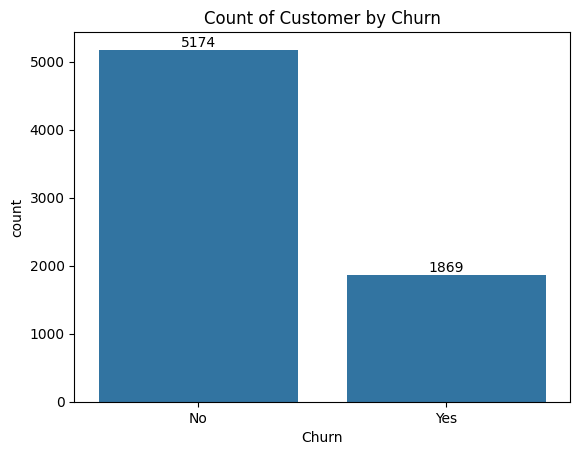

In [14]:
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

# Pie chart to understand Churn rate in percentage

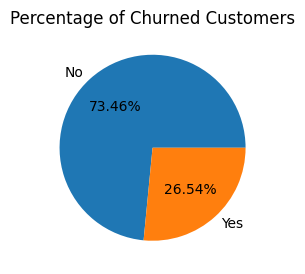

In [15]:
plt.figure(figsize = (3,4))
gb = df["Churn"].value_counts()
plt.pie(gb,
       labels = gb.index,
       autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()

# From the given pie chart we can conclude that 26.54% custmers have churned out.Now let's explore reasion behind it.

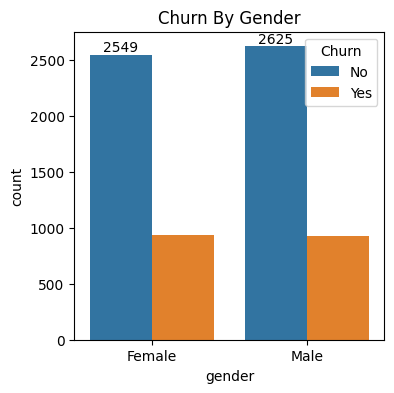

In [20]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'gender',
                   data = df,
                   hue="Churn"
                  )
ax.bar_label(ax.containers[0])
plt.title("Churn By Gender")
plt.show()

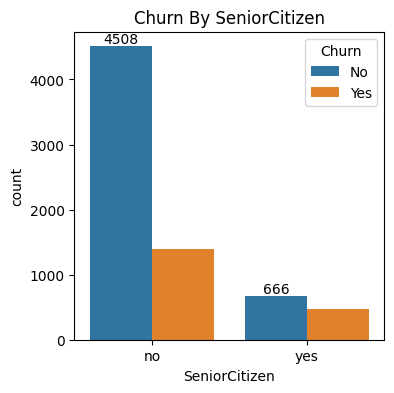

In [24]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'SeniorCitizen',data = df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn By SeniorCitizen")
plt.show()

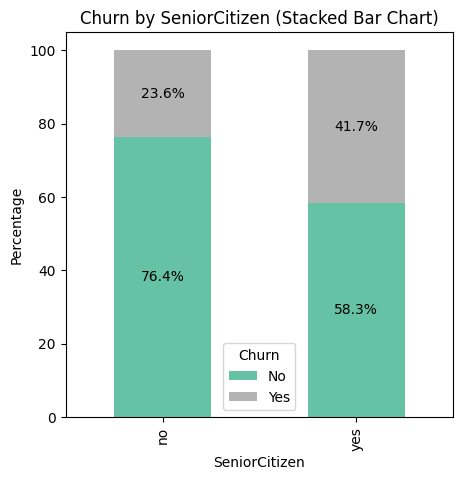

In [22]:
# Calculate counts
count_data = df.groupby(["SeniorCitizen", "Churn"]).size().reset_index(name="count")

# Pivot to wide format for stacked bar
pivot_df = count_data.pivot(index="SeniorCitizen", columns="Churn", values="count").fillna(0)

# Convert counts to percentages of total
pivot_perc = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = pivot_perc.plot(
    kind="bar",
    stacked=True,
    figsize=(5,5),
    colormap="Set2"
)

# Add percentage labels inside bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

plt.title("Churn by SeniorCitizen (Stacked Bar Chart)")
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen")
plt.legend(title="Churn")
plt.show()

# Comparatively a greater percentage of senior citizen category have churned

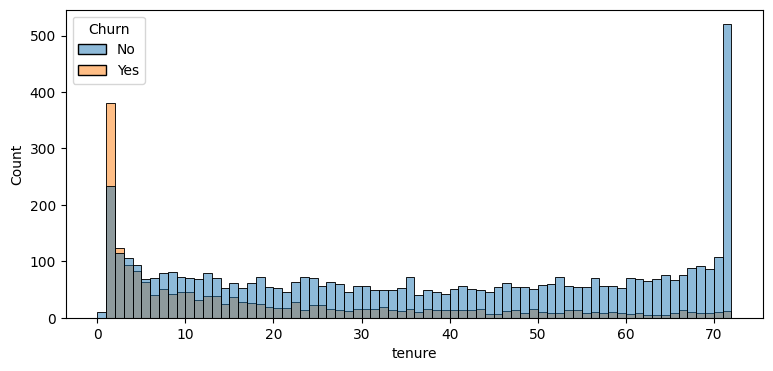

In [25]:
plt.figure(figsize=(9,4))
sns.histplot(x = 'tenure',data = df,bins = 72,hue = 'Churn')
plt.show()

# People who have used our services for a long time have stayed and people who have used 1 or 2 months have churned

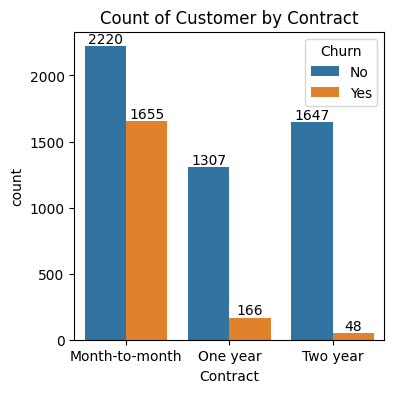

In [27]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'Contract', data = df, hue = 'Churn')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Count of Customer by Contract")
plt.show()

# People who have month-to-month contract have churn likely from those who have 1 or 2 years of contract

In [28]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

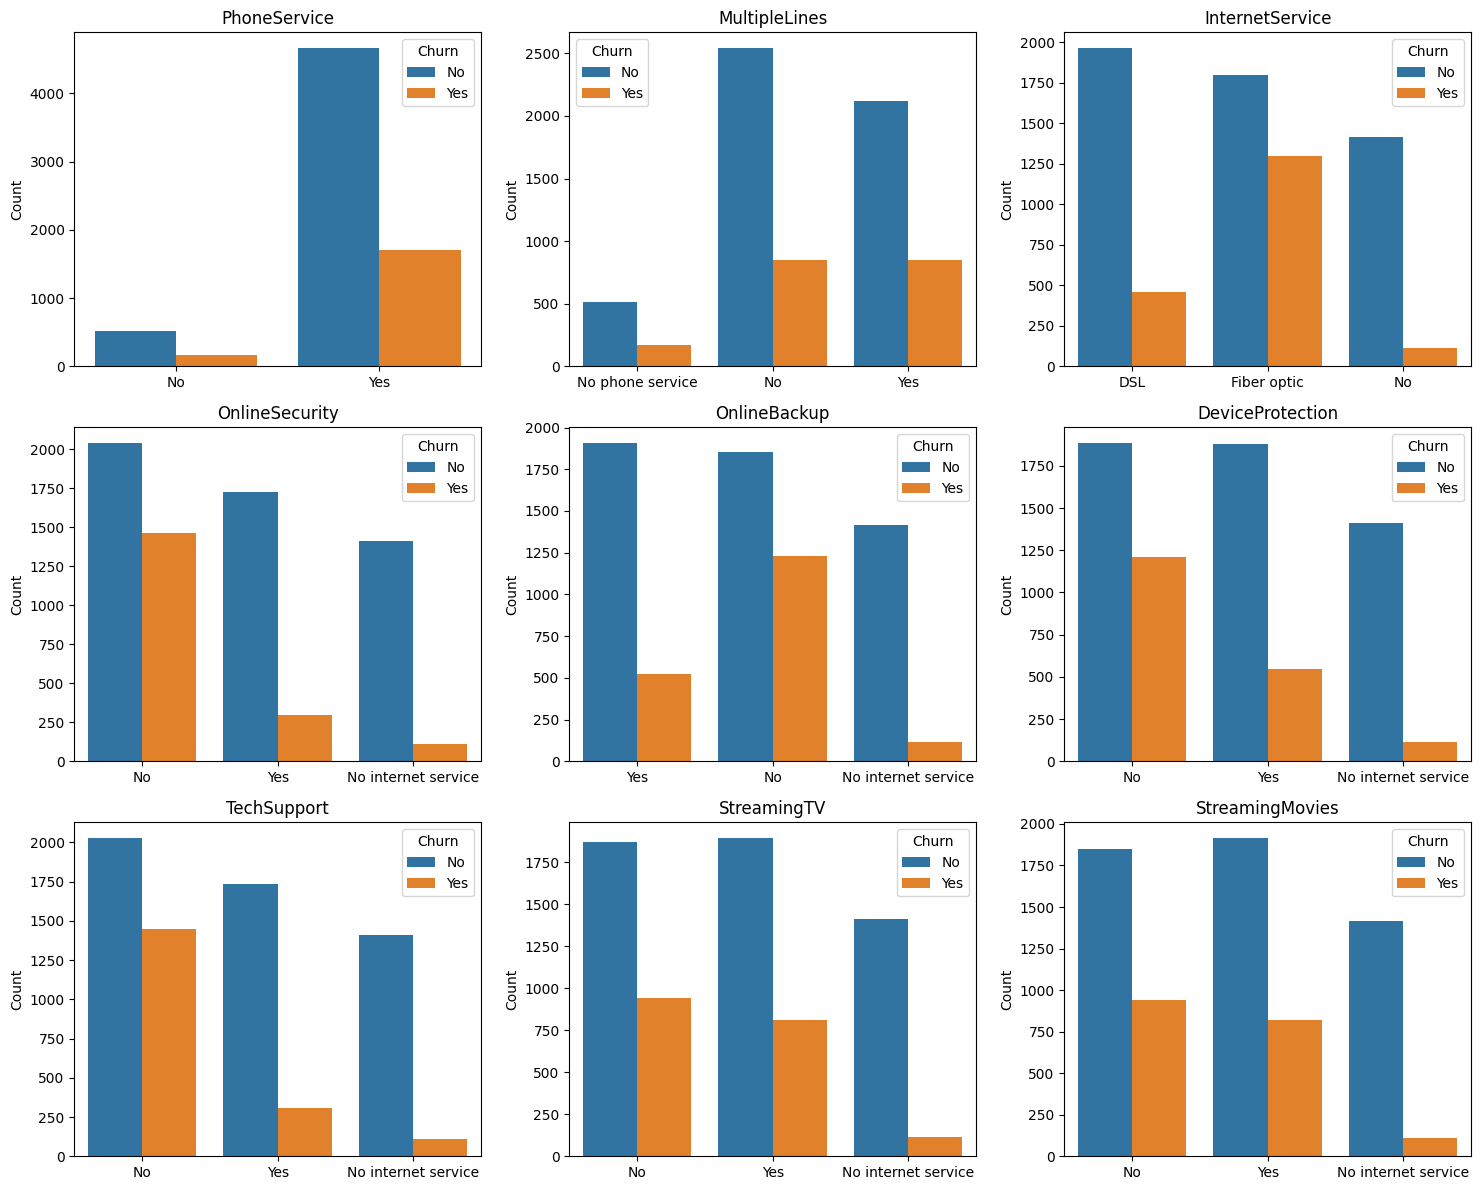

In [29]:
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define subplot grid (3 rows, 3 cols for 9 features)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten axes for easy looping
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], hue = df['Churn'])
    axes[i].set_title(col)
    axes[i].set_xlabel("")   # optional: hide x label text
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Customers with fiber optic internet and those lacking online security, backup, device protection, or tech support show a higher churn rate.

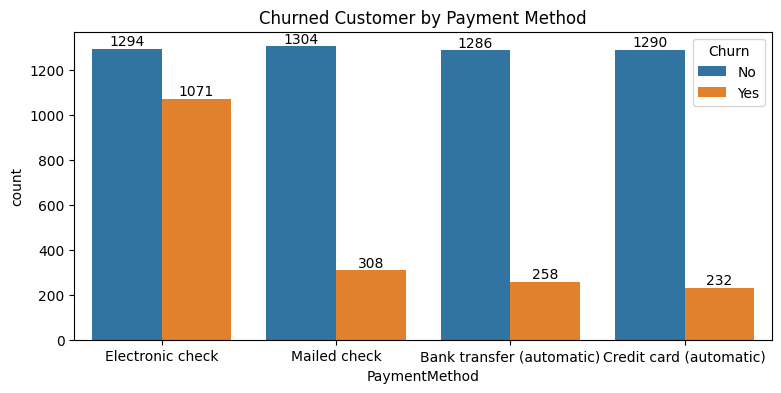

In [30]:
plt.figure(figsize=(9,4))
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Churned Customer by Payment Method")
plt.show()

# Customer is likely to churn when he is using electronic check as a payment method